# 105 Data Files

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#bpCAP">Bipolar CAP</a></li>
<li><a href="#thresh">Threshold and Recruitment</a></li>
<li><a href="#stimPol">Stimulus Polarity</a></li>
<li><a href="#condVel">Conduction Velocity</a></li>
<li><a href="#ref">Refractory</a></li>
<li><a href="#strength">Strength Duration</a></li>   
</ul>

<a id='intro'></a>
## Introduction

> The following notebook serves as a tutorial for the basics of creating figures for the Animal Physiology lab.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, I'll define paths to both 'read' my data from `readPath` and 'write' my data to `sciaticPath`.

In [5]:
readPath = 'Desktop/Data_Adrienne/Sciatic Data/'
sciaticPath = 'Desktop/Data_Adrienne/Sciatic Figures/'

Next I'll define some functions. A lot of the work is repetitive, so this just streamlines the process a little more.

In [43]:
def adjustValues(df):
    '''Cleans uploaded data. 
    
    The data in each .txt file have the following characteristics:
        1. Sometimes files are output with a column filled with Nan values.
        2. The files are always uploaded with time data in the first column, page number in the second, and 
           transducer output in the third. However, the files themselves don't have headers. 
        3. The time data is returned in seconds.
        4. The transducer output data returned in volts and does not account for applied gain (x100).
        
    Parameters:
        df (pd.DataFrame) - data for section of Lab
    '''
    # Deals with issue #1
    df.dropna(how='any', axis = 1, inplace=True)
    # Deals with issue #2
    df.columns = ['Time (ms)', 'Page', 'CAP (mV)']
    # Deals with issue #3
    df['Time (ms)'] = df['Time (ms)'] * 1000
    # Deals with issue #4
    df['CAP (mV)'] = df['CAP (mV)'] * 10
    return df

def plotCAP(df, xmin=0, xmax=10, ymin=-4, ymax=10, title = "", file_name='graph.jpg', save=False):
    '''Plots raw CAP data.
    
    Takes 
    
    Parameters:
        df (pd.DataFrame) - data for section of Lab
        title (str, optional) - Title of graph.
        file_name (str, optional) - File name of saved graph.
        save (bool, optional) - If True, our function will save the figure to the filepath provided. 
    '''
    plt.figure(figsize = (10,6))
    # plt.plot(x-axis_values, y-axis_values, color and display type (where 'b-' means 'blue line'))
    plt.plot(df['Time (ms)'], df['CAP (mV)'], 'b-')
    plt.title(title)
    plt.xlabel('Time (ms)')
    plt.ylabel('Preamplifier Output (mV)')
    plt.xlim(xmin = xmin, xmax = xmax)
    plt.ylim(ymin = ymin, ymax = ymax)
    if save:
        plt.savefig(sciaticPath + file_name, dpi=1200)
    else:
        plt.show()

All text files are separated by tabs ('\t') and contain no headers. Therefore, we'll create a dictionary for these arguments to pass through whenever we read a file. This gets added into the read_csv parameter as **kwargs.

In [44]:
kwargs = {'sep': '\t', 'header': None}

<a id='bpCAP'></a>
### Bipolar CAP

First, we'll read in a text file using pandas `pd.read_csv` function and name our output bipolarCAP.

In [45]:
bipolarCAP = pd.read_csv(readPath + 'Bipolar CAP.txt', **kwargs)
bipolarCAP.head()

,0,1,2,3
0,0.00000,1,-0.0020,NaN
1,0.00001,1,-0.0030,NaN
2,0.00002,1,-0.0055,NaN
3,0.00003,1,0.0000,NaN
4,0.00004,1,-0.0075,NaN


The output returned includes a column 3 filled with NaNs, as well as unadjusted time and transducer output values.

To deal with this, we'll:
- Use our `adjustValues` function to drop the NaN column.
- Use our `adjustValues` function to obtain time in msec and transducer output in mV. 

In [46]:
adjustValues(bipolarCAP)
bipolarCAP.head()

,Time (ms),Page,CAP (mV)
0,0.00,1,-0.020
1,0.01,1,-0.030
2,0.02,1,-0.055
3,0.03,1,0.000
4,0.04,1,-0.075


Let's try generating our first raw data file for the Bipolar CAP section of the lab:

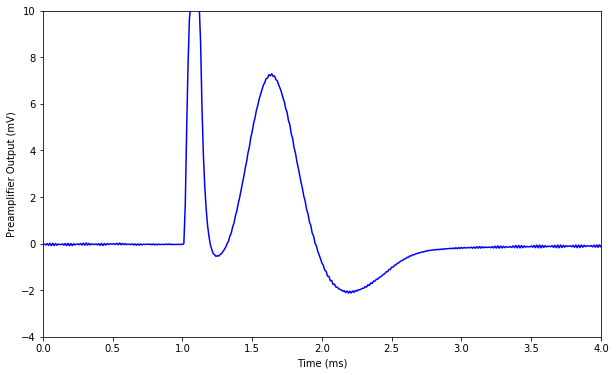

In [47]:
plotCAP(bipolarCAP, xmax=4)

<a id='thresh'></a>
### Threshold and Recruitment

In [48]:
recruitment = pd.read_csv(readPath + 'Threshold and Recruitment.txt', **kwargs)
recruitment = recruitment.dropna(axis = 1)
adjustValues(recruitment)
recruitment.head()

,Time (ms),Page,CAP (mV)
0,0.00,1,-0.070
1,0.01,1,0.000
2,0.02,1,-0.050
3,0.03,1,-0.025
4,0.04,1,-0.030


**For this next section, I want to create figures to show the output that one might see for:**
- Threshold
- Recruiting increasing numbers of fibers and fiber types
- Reaching maximum CAP

I can decide which pages best represent the data that I want to show by quickly clicking through pages in the associated Scope file.

Our `recruitment` output also contains data for all the pages in the Scope file, so we can just query those pages to use for plotting purposes.

In [49]:
# Threshold: 85-90 mV
vt_lower = recruitment[recruitment['Page'] == 4]
vt_upper = recruitment[recruitment['Page'] == 5]
threshold = [vt_lower, vt_upper]

# Six pages of increasing CAPs
page1 = recruitment[recruitment['Page'] == 6]
page2 = recruitment[recruitment['Page'] == 7]
page3 = recruitment[recruitment['Page'] == 8]
page4 = recruitment[recruitment['Page'] == 10]
page5 = recruitment[recruitment['Page'] == 15]
page6 = recruitment[recruitment['Page'] == 19]

# A list of the outputs associated with these specific pages
increases = [page1, page2, page3, page4, page5, page6]

# Three pages at max CAP
max1 = recruitment[recruitment['Page'] == 20]
max2 = recruitment[recruitment['Page'] == 21]
max3 = recruitment[recruitment['Page'] == 22]
maxPages = [max1, max2, max3]

allPages = [vt_lower, vt_upper, page1, page2, page3, page4, page5, page6, max1, max2, max3]

`Create threshold figures:`

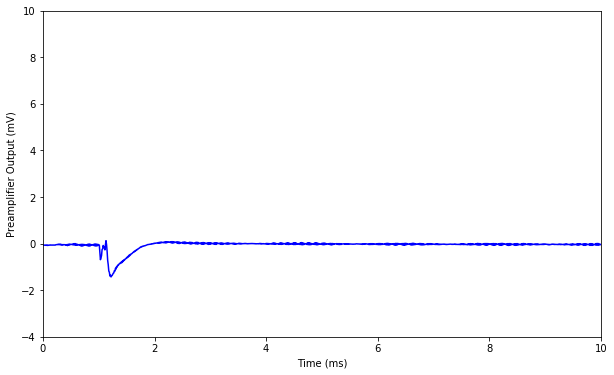

In [50]:
plotCAP(vt_lower)

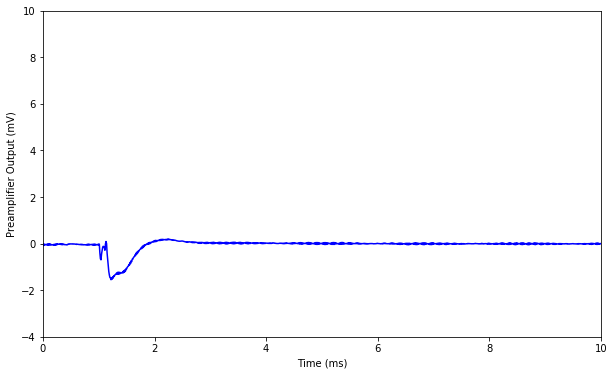

In [51]:
plotCAP(vt_upper)

To plot an overlay, we can simply plot both pages together. The `plotCAP` function we created can only handle one set of data, so we'll just plot this one from scratch.

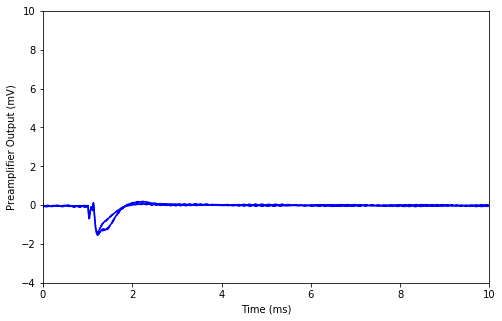

In [53]:
plt.figure(figsize = (8,5))
plt.plot(vt_lower['Time (ms)'], vt_lower['CAP (mV)'], 'b-', label = '75 mV')
plt.plot(vt_upper['Time (ms)'], vt_upper['CAP (mV)'], 'b-', label = '80 mV')
plt.title('')
plt.xlabel('Time (ms)')
plt.ylabel('Preamplifier Output (mV)')
plt.xlim(xmin = 0, xmax = 10)
plt.ylim(ymin = -4, ymax = 10)
#plt.legend()
plt.show()

Additionally, we can create multiple subplots using matplotlib's `subplots` function, which gives the reader the opportunity to more easily visualize how the data will appear sequentially.

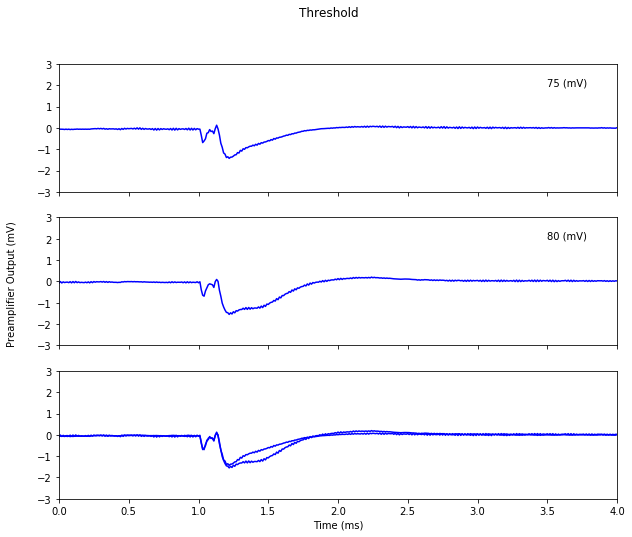

In [58]:
f, ax = plt.subplots(3,1, sharex = 'all', sharey = 'all', figsize = (10,8))
ax[0].plot(vt_lower['Time (ms)'], vt_lower['CAP (mV)'], 'b-')
ax[1].plot(vt_upper['Time (ms)'], vt_upper['CAP (mV)'], 'b-')
ax[2].plot(vt_lower['Time (ms)'], vt_lower['CAP (mV)'], 'b-')
ax[2].plot(vt_upper['Time (ms)'], vt_upper['CAP (mV)'], 'b-')
f.suptitle('Threshold', fontsize=12)
plt.xlabel('Time (ms)')
f.text(0.06, 0.5, 'Preamplifier Output (mV)', va='center', ha='center', rotation='vertical')
plt.xlim(xmin = 0, xmax = 4)
plt.ylim(ymin = -3, ymax = 3)
ax[0].text(3.5, 2, '75 (mV)', fontsize=10)
ax[1].text(3.5, 2, '80 (mV)', fontsize=10)
plt.show()

`Create recruitment figures that appear such that:`
- The page the user is "on" appears dark blue
- Previously called pages are a more muted blue
    - A color I really liked had the hex code #4d75b3, but of course you can substitute any of the colors to your preference

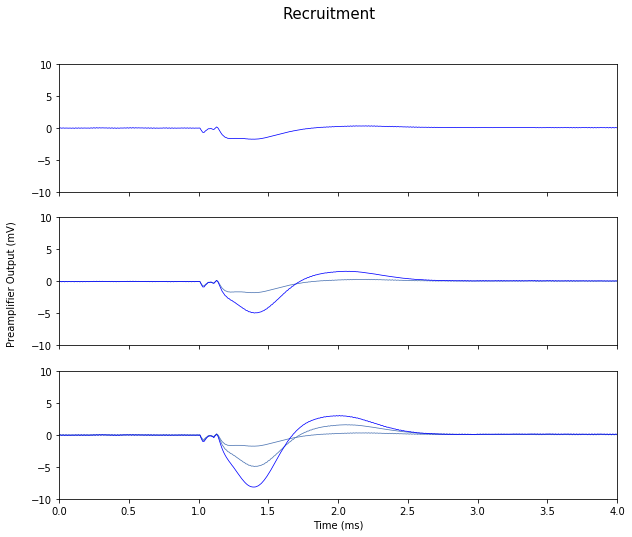

In [12]:
f, ax = plt.subplots(3,1, sharex = 'all', sharey = 'all', figsize = (10,8))
ax[0].plot(page1['Time (ms)'], page1['CAP (mV)'], 'b-', linewidth=0.75)
ax[1].plot(page1['Time (ms)'], page1['CAP (mV)'], '#4d75b3', linewidth=0.75)
ax[1].plot(page2['Time (ms)'], page2['CAP (mV)'], 'b-', linewidth=0.75)
ax[2].plot(page1['Time (ms)'], page1['CAP (mV)'], '#4d75b3', linewidth=0.75)
ax[2].plot(page2['Time (ms)'], page2['CAP (mV)'], '#4d75b3', linewidth=0.75)
ax[2].plot(page3['Time (ms)'], page3['CAP (mV)'], 'b-', linewidth=0.75)
f.suptitle('Recruitment', fontsize = 15)
plt.xlabel('Time (ms)')
f.text(0.06, 0.5, 'Preamplifier Output (mV)', va='center', ha='center', rotation='vertical')
plt.xlim(xmin = 0, xmax = 4)
plt.ylim(ymin = -10, ymax = 10)
plt.show()

You can imagine that individually calling each page can get cumbersome, especially if you wanted to plot more than five pages. To make your life easier, you can use `for loops`, which iterate through the functions you provide.

Remember, we created a list that contains info for multiple pages of interest called `allPages`. We can check:
- how many pages we included using the `len()` function and 
- the information included in each page using the notation `allPages[i]`, where i ranges from 0 (the first page in our list) to 10 (the last page in our list).

In [63]:
len(allPages)

11

In [64]:
allPages[0]

,Time (ms),Page,CAP (mV)
3840,0.00,4,-0.060
3841,0.01,4,-0.060
3842,0.02,4,-0.065
3843,0.03,4,-0.065
3844,0.04,4,-0.075
...,...,...,...
5115,12.75,4,-0.045
5116,12.76,4,-0.030
5117,12.77,4,-0.045
5118,12.78,4,-0.035


We can iterate through out `allPages` list to create one column of three subplots (hence .subplots(3,1)) and plot our data with little hands-on work.

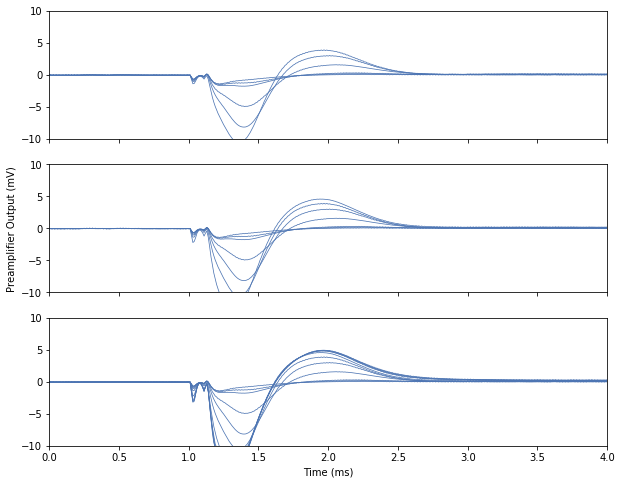

In [65]:
f, ax = plt.subplots(3,1, sharex = 'all', sharey = 'all', figsize = (10,8))
i=0
for i in range(len(allPages)):
    ax[0].plot(allPages[i]['Time (ms)'], allPages[i]['CAP (mV)'], '#4d75b3', linewidth = 0.75)
    if i >= 5:
        break
for i in range(len(allPages)):
    ax[1].plot(allPages[i]['Time (ms)'], allPages[i]['CAP (mV)'], '#4d75b3', linewidth = 0.75)
    if i >= 6:
        break
for i in range(len(allPages)):    
    ax[2].plot(allPages[i]['Time (ms)'], allPages[i]['CAP (mV)'], '#4d75b3', linewidth = 0.75)
f.suptitle('')
plt.xlabel('Time (ms)')
ax[1].set_ylabel('Preamplifier Output (mV)')
plt.xlim(xmin = 0, xmax = 4)
plt.ylim(ymin = -10, ymax = 10)
plt.show()

<a id='stimPol'></a>
### Stimulus Polarity

In [66]:
polarity = pd.read_csv(readPath + 'Stimulus Polarity.txt', **kwargs)
adjustValues(polarity)

,Time (ms),Page,CAP (mV)
0,0.00,1,-0.065
1,0.01,1,-0.010
2,0.02,1,-0.055
3,0.03,1,-0.030
4,0.04,1,-0.040
...,...,...,...
2555,12.75,2,-0.135
2556,12.76,2,-0.090
2557,12.77,2,-0.120
2558,12.78,2,-0.115


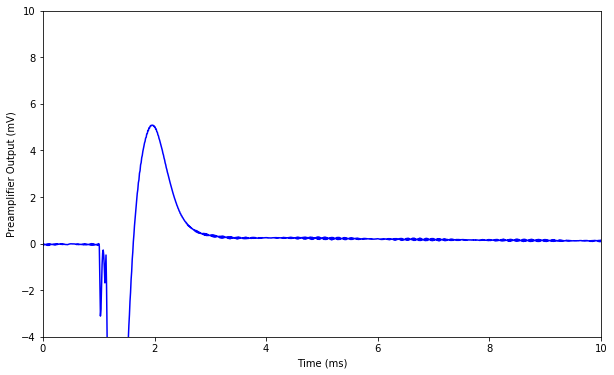

In [68]:
# Plots Page 1 of stimulus polarity data
plotCAP(polarity[polarity['Page'] == 1])

There's a lot of whitespace in this figure. Let's cut our output to 4 msec. 

In [69]:
polarity = polarity[polarity['Time (ms)'] <= 4]

We don't have to do this next part since it's kind of obvious, but I assigned the first page to `pos_stim` and the second page to `neg_stim` for positive and negative stimulus, respectively.

In [70]:
pos_stim = polarity[polarity['Page'] == 1]
neg_stim = polarity[polarity['Page'] == 2]

Let's see how that looks:

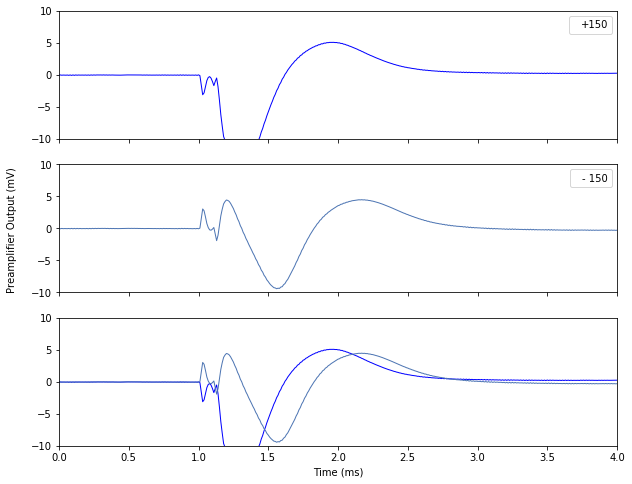

In [71]:
f, ax = plt.subplots(3,1, sharex = 'all', sharey = 'all', figsize = (10,8))
ax[0].plot(pos_stim['Time (ms)'], pos_stim['CAP (mV)'], 'b-', linewidth=1, label = '+150')
ax[1].plot(neg_stim['Time (ms)'], neg_stim['CAP (mV)'], '#4d75b3', linewidth=1, label = '- 150')
ax[2].plot(pos_stim['Time (ms)'], pos_stim['CAP (mV)'], 'b-', linewidth=1)
ax[2].plot(neg_stim['Time (ms)'], neg_stim['CAP (mV)'], '#4d75b3', linewidth=1)
plt.xlabel('Time (ms)')
f.text(0.06, 0.5, 'Preamplifier Output (mV)', va='center', ha='center', rotation='vertical')
plt.xlim(xmin = 0, xmax = 4)
plt.ylim(ymin = -10, ymax = 10)
ax[0].legend(handlelength = 0)
ax[1].legend(handlelength = 0)
plt.show()

<a id='condVel'></a>
### Conduction Velocity

In [72]:
condVel = pd.read_csv(readPath + 'Conduction Velocity.txt', **kwargs)
adjustValues(condVel)
condVel = condVel[condVel['Time (ms)'] <= 4]
condVel.head()

,Time (ms),Page,CAP (mV)
0,0.00,1,0.000
1,0.01,1,0.035
2,0.02,1,-0.035
3,0.03,1,0.070
4,0.04,1,-0.060


The first page contains data for when the recording electrode is placed at position D, and the second for position E. Again, it's obvious, but we might as well assign them names for more intuitive querying. 

In [74]:
re_d = condVel[condVel['Page'] == 1]
re_e = condVel[condVel['Page'] == 2]

To find CAP latency, we measure from the onset of the stimulus artifact to the peak of the CAP. If the peak of the CAP is the highest point in our data, we can simply query for the maximum transducer output using the `.max()` function, and find the associated time data. 

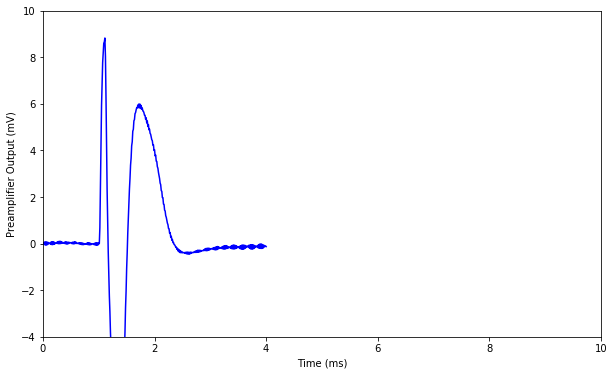

In [75]:
plotCAP(re_d)

Our stimulus artifact is actually *far greater* than the CAP, so we will have to find the maximum transducer output associated with times after the stimulus artifact. Here I chose 1.5 msec.

In [77]:
# Get the output only for times after 1.50 ms.
re_d[re_d['Time (ms)'] >= 1.5]

,Time (ms),Page,CAP (mV)
150,1.50,1,-1.070
151,1.51,1,-0.385
152,1.52,1,0.445
153,1.53,1,1.085
154,1.54,1,1.730
...,...,...,...
396,3.96,1,-0.070
397,3.97,1,-0.135
398,3.98,1,-0.095
399,3.99,1,-0.100


In [78]:
# Find the maximum CAP amplitude for this subset of the data
re_d[re_d['Time (ms)'] >= 1.5]['CAP (mV)'].max()

5.995

In [83]:
# Look for the row with the information on that CAP amplitude
re_d[re_d['CAP (mV)'] == re_d[re_d['Time (ms)'] >= 1.5]['CAP (mV)'].max()]

,Time (ms),Page,CAP (mV)
172,1.72,1,5.995


>CAP latency with the negative recording electrode at position D is 1.72 ms. 

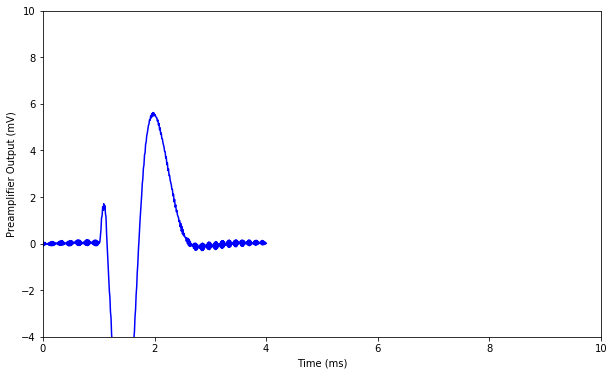

In [84]:
plotCAP(re_e)

When the electrode is at position E, our CAP is actually far larger than our stimulus artifact. This is great, because we can get CAP latency without doing any preliminary time query. 

In [28]:
re_e[re_e['CAP (mV)'] == re_e['CAP (mV)'].max()]

,Time (ms),Page,CAP (mV)
1477,1.97,2,5.625


>CAP latency with the negative recording electrode at position E is 1.97 ms. 

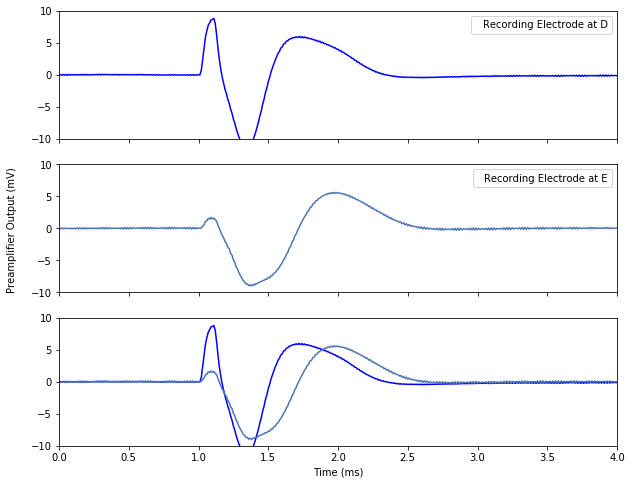

In [87]:
f, ax = plt.subplots(3,1, sharex = 'all', sharey = 'all', figsize = (10,8))
ax[0].plot(re_d['Time (ms)'], re_d['CAP (mV)'], 'b-', label = 'Recording Electrode at D')
ax[1].plot(re_e['Time (ms)'], re_e['CAP (mV)'], '#4d75b3', label = 'Recording Electrode at E')
ax[2].plot(re_d['Time (ms)'], re_d['CAP (mV)'], 'b-')
ax[2].plot(re_e['Time (ms)'], re_e['CAP (mV)'], '#4d75b3')
f.suptitle('')
plt.xlabel('Time (ms)')
f.text(0.06, 0.5, 'Preamplifier Output (mV)', va='center', ha='center', rotation='vertical')
plt.xlim(xmin = 0, xmax = 4)
plt.ylim(ymin = -10, ymax = 10)
ax[0].legend(handlelength = 0)
ax[1].legend(handlelength = 0)
plt.show()

<a id='ref'></a>
### Refractory Period

In [91]:
refractory = pd.read_csv(readPath + 'Refractory.txt', skiprows=1, **kwargs)
refractory.drop(columns=[3,4], axis=1, inplace=True)
adjustValues(refractory)
refractory.head()

,Time (ms),Page,CAP (mV)
0,0.00,1,-0.23
1,0.01,1,-0.01
2,0.02,1,-0.27
3,0.03,1,0.02
4,0.04,1,-0.28


**For this next section, I want to create figures to show the output that one might see for:**
- Decreasing stimulus intervals
- Reaching absolute refractory period for the whole nerve

Just like before, we'll use Scope data to find which page corresponds to which stimulus interval.

In [92]:
ten = refractory[refractory['Page'] == 1]
nine = refractory[refractory['Page'] == 2]
five = refractory[refractory['Page'] == 6]
two = refractory[refractory['Page'] == 12]
one = refractory[refractory['Page'] == 13]
ARP = refractory[refractory['Page'] == 14]
refractoryPages = [ten, nine, five, two, one, ARP]

In hindsight, the below code was pretty useless. However, if you wanted to have fun creating figures for each stimulus interval relatively easily, this fuction could be useful.

In [93]:
def plotRef(df, title='', file_name='', save=False):
    plt.figure(figsize = (10,5))
    plt.plot(df['Time (ms)'], df['CAP (mV)'], 'b-', linewidth=0.75)
    plt.title(title)
    plt.xlabel('Time (ms)')
    plt.ylabel('Preamplifier Output (mV)')
    plt.xlim(xmin = 0, xmax = 12.75)
    if save:
        plt.savefig(sciaticPath + file_name, dpi=500)
    else:
        plt.show()

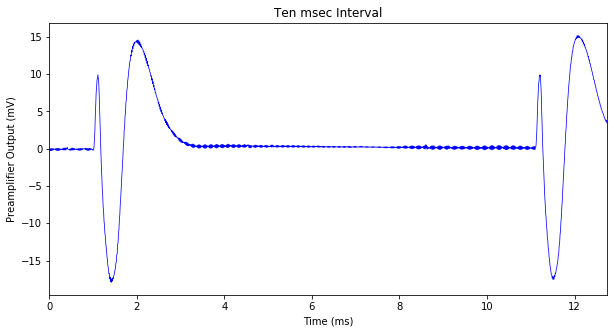

In [94]:
plotRef(ten, 'Ten msec Interval')

It would again be useful to use `subplots` for our refractory section. This way, our reader can visualize how the raw data changes as the stimulus interval decreases. 

Text(0.05, 0.4, 'Preamplifier Output (mV)')

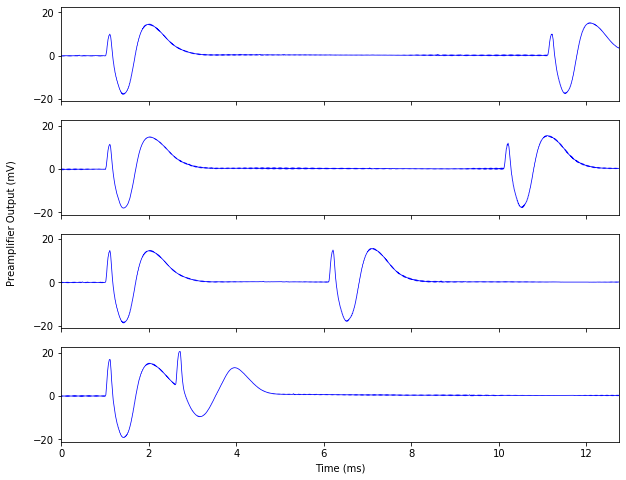

In [34]:
f, ax = plt.subplots(4,1, sharex = 'all', sharey = 'all', figsize = (10,8))
j=0
i=0
for i in range(len(refractoryPages)):
    ax[j].plot(refractoryPages[i]['Time (ms)'], refractoryPages[i]['CAP (mV)'], 'b-', linewidth=0.75)
    j=j+1
    i=i+1
    if i>=4:
        break
plt.xlabel('Time (ms)')
plt.xlim(xmin=0, xmax=12.75)
f.text(0.05, 0.4, 'Preamplifier Output (mV)', rotation = 'vertical')

`Plotting absolute refractory period data:`

Text(0, 0.5, 'Preamplifier Output(mv)')

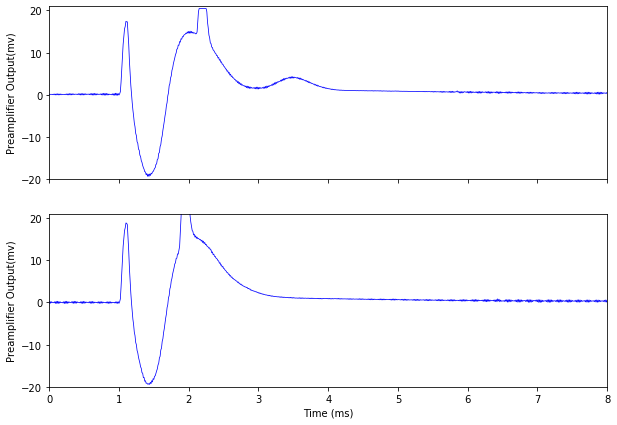

In [36]:
f, ax = plt.subplots(2,1, sharex = 'all', sharey = 'all', figsize = (10,7))
j=0
for i in range(4,6):
    ax[j].plot(refractoryPages[i]['Time (ms)'], refractoryPages[i]['CAP (mV)'], 'b-', linewidth=0.75)
    j = j + 1
plt.xlabel('Time (ms)')
plt.xlim(xmin=0, xmax=8)
plt.ylim(ymin=-20, ymax=21)
ax[0].set_ylabel('Preamplifier Output(mv)')
ax[1].set_ylabel('Preamplifier Output(mv)')

<a id='strength'></a>
### Strength Duration

In [98]:
strengthDurationFull = pd.read_csv(readPath + 'Strength Duration Full.txt', **kwargs)
adjustValues(strengthDurationFull)
strengthDurationFull.head()

,Time (ms),Page,CAP (mV)
0,0.00,1,0.150
1,0.01,1,-0.120
2,0.02,1,0.115
3,0.03,1,-0.050
4,0.04,1,0.055


**For this last section, I want to create figures to show the output that one might see for:**
- All the strength duration data
- A strength-duration curve
- 0.1, 0.2, and 0.3 ms data

Let's plot each page's data and see what it looks like:

(-10, 10)

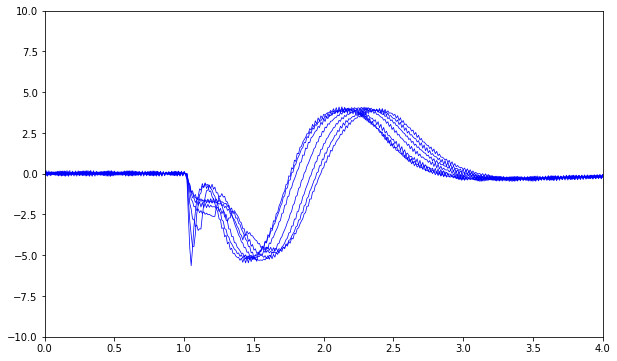

In [99]:
plt.figure(figsize=(10,6))
for page, _df in strengthDurationFull.groupby('Page'):
    plt.plot(_df['Time (ms)'], _df['CAP (mV)'], 'b-', linewidth=0.75)
plt.xlim(xmin=0, xmax=4)
plt.ylim(ymin=-10, ymax=10)

Next, I created a table where the Duration column includes the durations we were to stimulate the nerve for, as laid out in the lab manual. Next, I made up values for stimulus amplitude, more or less guess and checking for a nice curve by using a plotting function.

In [38]:
values = {'Duration (ms)': [0.03, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
         'Stimulus Amplitude (mV)':[450, 360, 200, 100, 80, 70, 70]}
strengthDurationTable = pd.DataFrame(data=values)
strengthDurationTable

,Duration (ms),Stimulus Amplitude (mV)
0,0.03,450
1,0.05,360
2,0.10,200
3,0.20,100
4,0.30,80
5,0.40,70
6,0.50,70


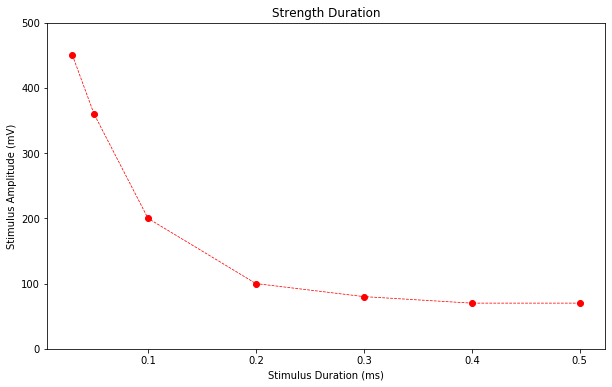

In [39]:
plt.figure(figsize = (10,6))
plt.plot(strengthDurationTable['Duration (ms)'], strengthDurationTable['Stimulus Amplitude (mV)'], 'ro--', linewidth=0.75)
plt.title("Strength Duration")
plt.xlabel('Stimulus Duration (ms)')
plt.ylabel('Stimulus Amplitude (mV)')
plt.ylim(ymin = 0, ymax = 500)
plt.show()

In [115]:
page1 = strengthDurationFull[strengthDurationFull.Page == 1]
page2 = strengthDurationFull[strengthDurationFull.Page == 4]
page3 = strengthDurationFull[strengthDurationFull.Page == 5]

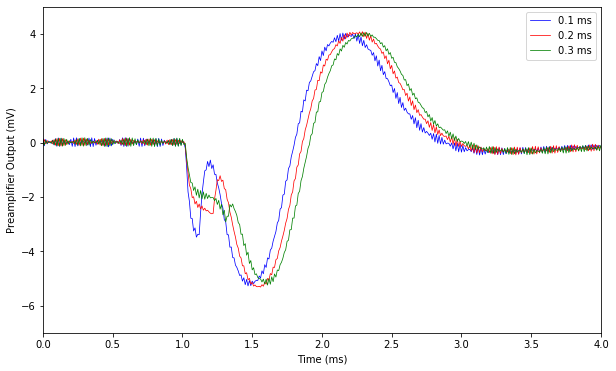

In [130]:
plt.figure(figsize =(10,6))
plt.plot(page1['Time (ms)'], page1['CAP (mV)'], 'b-', label = '0.1 ms', linewidth = 0.75)
plt.plot(page2['Time (ms)'], page2['CAP (mV)'], 'r-', label = '0.2 ms', linewidth = 0.75)
plt.plot(page3['Time (ms)'], page3['CAP (mV)'], 'g-', label = '0.3 ms', linewidth = 0.75)
plt.xlim(xmin=0, xmax=4)
plt.ylim(ymax=5, ymin=-7)
plt.xlabel('Time (ms)')
plt.ylabel('Preamplifier Output (mV)')
plt.legend()

```
```